# 22000070_NguyenThiAnh

# Thực hành 3


# Ví dụ A1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2)

# Dữ liệu
X_train = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
                     2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]]).T
Y_train = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 
                    1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [6]:

X_test = np.array([[2.45], [1.85], [3.75], [3.21], [4.05]])

# Hàm tìm k lân cận gần nhất
def find_nearest_index(X_train, x_test, k):
    distances = np.abs(X_train - x_test)  # Khoảng cách tuyệt đối
    return np.argsort(distances.flatten())[:k]  # Lấy k vị trí gần nhất

# Khởi tạo giá trị k
k = 3
Y_pred = np.zeros(len(X_test), dtype=int)

# Dự đoán kết quả dựa vào trung bình k-lân cận gần nhất
for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], k)
    Y_pred[i] = np.mean(Y_train[indices])  # Trung bình nhãn của k lân cận
    Y_pred[i] = 1 if Y_pred[i] > 0.5 else 0  # Phân loại dựa trên ngưỡng 0.5
    print(f"Dự đoán cho X_test = {X_test[i].item():.2f}: {int(Y_pred[i])}")



Dự đoán cho X_test = 2.45: 0
Dự đoán cho X_test = 1.85: 0
Dự đoán cho X_test = 3.75: 0
Dự đoán cho X_test = 3.21: 0
Dự đoán cho X_test = 4.05: 1


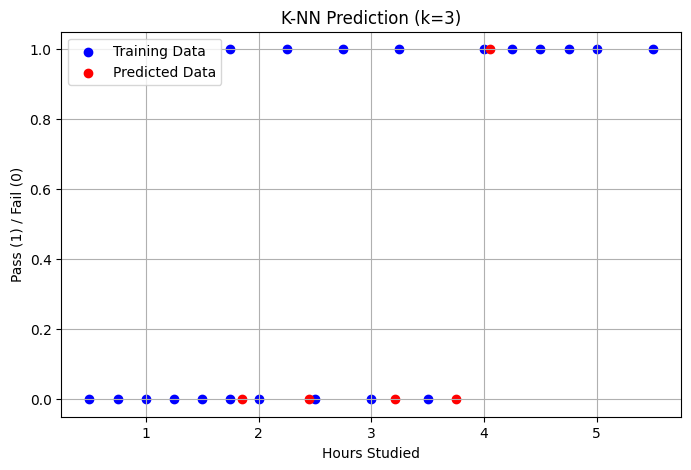

In [123]:
# Vẽ đồ thị
plt.figure(figsize=(8, 5))
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.scatter(X_test, Y_pred, color='red', label='Predicted Data')

# Thêm chú thích
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')
plt.title(f'K-NN Prediction (k={k})')
plt.legend()  # Hiển thị chú thích
plt.grid()
plt.show()

# Vi du B1

In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

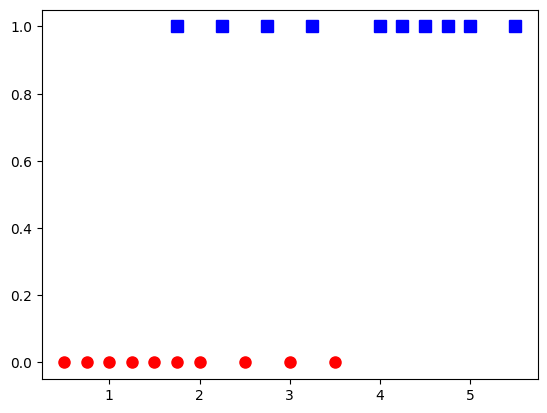

In [32]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

In [ ]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]  # tham so thata
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    # loop of stochastic gradient descent
    while count < max_count:
 # shuffle the order of data (for stochastic gradient descent). 
 # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0: 
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [37]:
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)
w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])
print(sigmoid(np.dot(w[-1].T, X)))

[[-4.08175132]
 [ 1.59767816]]
[[0.03616207 0.05297564 0.07698228 0.11059738 0.15640363 0.21656209
  0.21656209 0.29185433 0.38060633 0.47812499 0.57734009 0.67068463
  0.75226009 0.81907932 0.9096165  0.93751937 0.95721336 0.9708925
  0.9802884  0.9910355 ]]


In [ ]:
# Danh sách số giờ học của các sinh viên mới
hours_new = np.array([2.45, 1.85, 3.75, 3.21, 4.05])
X_new = np.vstack((np.ones(hours_new.shape), hours_new))

# Dự đoán xác suất đỗ
y_pred = sigmoid(np.dot(w[-1].T, X_new))
# In ra dự đoán
for i, (h, p) in enumerate(zip(hours_new, y_pred[0])):
    print(f"Student ID {21 + i}: Hours = {h}, Predicted Probability = {p:.4f}, Predicted Class = {'Pass' if p >= 0.5 else 'Fail'}")

Student ID 21: Hours = 2.45, Predicted Probability = 0.4582, Predicted Class = Fail
Student ID 22: Hours = 1.85, Predicted Probability = 0.2449, Predicted Class = Fail
Student ID 23: Hours = 3.75, Predicted Probability = 0.8710, Predicted Class = Pass
Student ID 24: Hours = 3.21, Predicted Probability = 0.7402, Predicted Class = Pass
Student ID 25: Hours = 4.05, Predicted Probability = 0.9160, Predicted Class = Pass


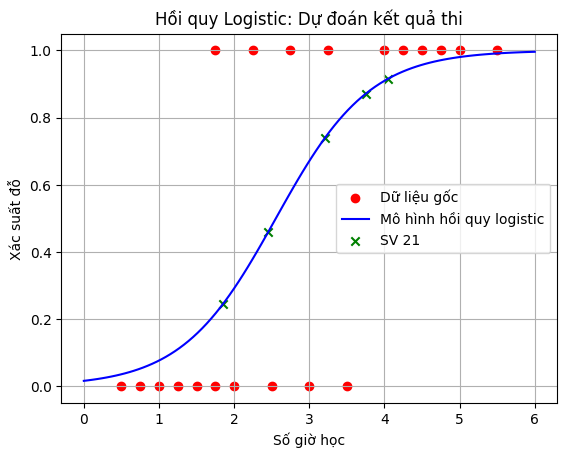

In [41]:
# Vẽ dữ liệu gốc
plt.scatter(X[1, :], y, c='red', marker='o', label="Dữ liệu gốc")

# Vẽ đường hồi quy logistic
x_vals = np.linspace(0, 6, 100)
X_vis = np.vstack((np.ones(x_vals.shape), x_vals))
y_vals = sigmoid(np.dot(w[-1].T, X_vis))

plt.plot(x_vals, y_vals.flatten(), 'b', label="Mô hình hồi quy logistic")

# Vẽ các điểm dự đoán mới
for i, h in enumerate(hours_new):
    plt.scatter(h, sigmoid(np.dot(w[-1].T, [1, h])), color='green', marker='x', label=f"SV {21 + i}" if i == 0 else "")

# Định dạng đồ thị
plt.xlabel("Số giờ học")
plt.ylabel("Xác suất đỗ")
plt.title("Hồi quy Logistic: Dự đoán kết quả thi")
plt.legend()
plt.grid()

# Hiển thị hình vẽ
plt.show()

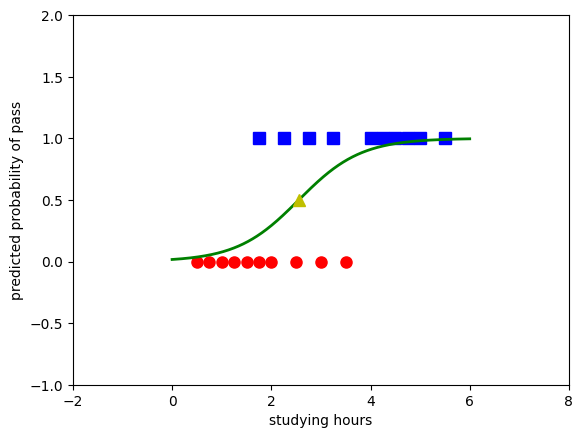

In [38]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]
plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

## Biểu đồ K-NN:

### Hiển thị kết quả dự đoán với các giá trị 𝑘=3,4,5
### Khi k thay đổi, đường biên quyết định thay đổi theo.
### K-NN phụ thuộc vào giá trị k và có thể bị nhiễu nếu dữ liệu không ổn định.

## Biểu đồ Logistic Regression:

### Đường cong sigmoid biểu diễn xác suất sinh viên đậu dựa trên số giờ học.
### Đường ngưỡng 𝑦=0.5 xác định quyết định đỗ/trượt.

## Kết luận: Logistic Regression có tính tổng quát hóa tốt hơn, không bị ảnh hưởng bởi số lượng điểm lân cận như K-NN.

# Ví dụ B2

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# generate list of data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

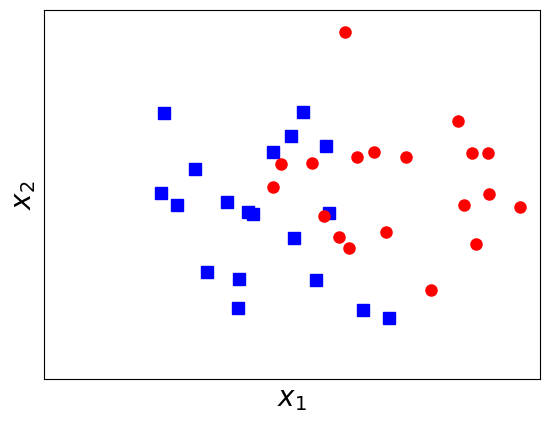

In [2]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [9]:
def sigmoid(s):
    return 1/(1 + np.exp(-s)) # calculate sigmoid function
def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data for stochastic gradient descent method
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [10]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T
# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) 
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
# print out the parameter
print(w[-1])

[[-9.45940375]
 [ 2.292379  ]
 [ 1.44576131]]


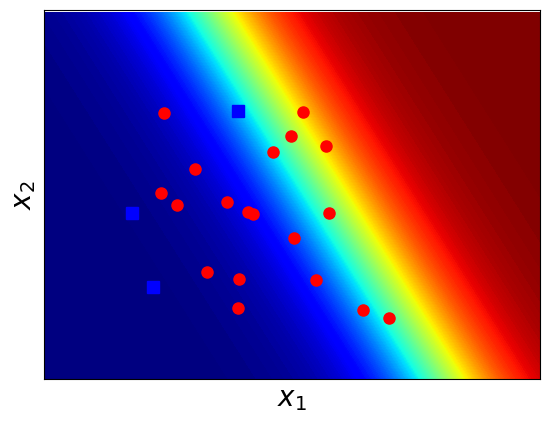

In [11]:
# Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X[:, 0], X[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

# Ví dụ B.3 (Bài tập 1)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error


# reading CSV file
data = read_csv("D:\\Hoc may\\Thưc hành 3\\Admission_Predict.csv")
# converting column data to list, then convert list to array

sn = data['Serial No.'].tolist()

gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)

sop = data['SOP'].tolist()
X4 = np.asarray(sop)

lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)

prob_Admit = data['Chance of Admit'].tolist()
Yt = np.asarray(prob_Admit)

# printing list data
print(data.columns)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [81]:
def sigmoid(s):
    s = np.clip(s, -500, 500)  # Giới hạn giá trị đầu vào trong khoảng hợp lý
    return 1 / (1 + np.exp(-s))



# Hồi quy Logistic sử dụng Stochastic Gradient Descent
def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20

    while count < max_count:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [79]:

# Chọn 350 dòng làm dữ liệu training, còn lại làm dữ liệu test
train_data = data.iloc[:350]
test_data = data.iloc[350:]

# Chuyển đổi nhãn sang dạng nhị phân
train_data.loc[:, 'Chance of Admit'] = (train_data['Chance of Admit'] >= 0.75).astype(int)
test_data.loc[:, 'Chance of Admit'] = (test_data['Chance of Admit'] >= 0.75).astype(int)

# Lấy dữ liệu đầu vào và nhãn
X_train = train_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values.T
y_train = train_data['Chance of Admit'].values
X_test = test_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].values.T
y_test = test_data['Chance of Admit'].values

# Thêm hàng giá trị 1 vào X để xử lý hệ số tự do
X_train = np.vstack((np.ones((1, X_train.shape[1])), X_train))
X_test = np.vstack((np.ones((1, X_test.shape[1])), X_test))

# Khởi tạo trọng số ngẫu nhiên
w_init = np.random.randn(X_train.shape[0], 1)
eta = 0.01

# Huấn luyện Logistic Regression
w = logistic_sigmoid_regression(X_train, y_train, w_init, eta)

# Dự đoán trên tập test
y_prob = sigmoid(np.dot(w[-1].T, X_test))
y_pred = (y_prob >= 0.5).astype(int).flatten()

# Đánh giá mô hình Logistic Regression
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Logistic Regression (SGD) Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")




Logistic Regression (SGD) Evaluation:
Accuracy: 0.44
Precision: 0.44
Recall: 1.00
F1 Score: 0.61


In [82]:
# b) Bài tập thực hành: Dự đoán khả năng bằng hồi quy tuyến tính

y_train_reg = train_data['Chance of Admit']
y_test_reg = test_data['Chance of Admit']
lin_reg = LinearRegression()
lin_reg.fit(X_train[1:].T, y_train_reg)
y_pred_reg = lin_reg.predict(X_test[1:].T)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Linear Regression Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")

Linear Regression Evaluation:
Mean Squared Error: 0.0959


In [30]:
# So sánh thời gian chạy và độ chính xác giữa Naïve Bayes và Hồi quy Logistic
nb_model = GaussianNB()
start_time = time.time()
nb_model.fit(X_train[1:].T, y_train)
nb_time = time.time() - start_time
y_pred_nb = nb_model.predict(X_test[1:].T)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("Naïve Bayes Evaluation:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print(f"F1 Score: {f1_nb:.2f}")
print(f"Training Time: {nb_time:.4f} seconds")

Naïve Bayes Evaluation:
Accuracy: 0.90
Precision: 0.95
Recall: 0.82
F1 Score: 0.88
Training Time: 0.0095 seconds


In [83]:
# Huấn luyện Logistic Regression bằng Scikit-Learn
logReg = LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)
logReg.fit(X_train[1:].T, y_train)

# Dự đoán với Scikit-Learn
y_pred_sklearn = logReg.predict(X_test[1:].T)

# Đánh giá mô hình từ Scikit-Learn
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)
print("Scikit-Learn Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print(f"Precision: {precision_sklearn:.2f}")
print(f"Recall: {recall_sklearn:.2f}")
print(f"F1 Score: {f1_sklearn:.2f}")
print(f"Coefficients: {logReg.coef_}")


Scikit-Learn Logistic Regression Evaluation:
Accuracy: 0.90
Precision: 0.95
Recall: 0.82
F1 Score: 0.88
Coefficients: [[0.03766513 0.10188274 0.44662053 0.37285868 0.56671866 3.33626945
  0.92391419]]


# Ví dụ B.4 (Bài tập 2):

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Đường dẫn tới tệp dữ liệu của bạn
data = pd.read_csv("D:\\Hoc may\\Thưc hành 3\\banking.csv")


# Chuyển đổi trường 'month'
dict_month = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
data['month'] = data['month'].map(dict_month)

# Chuyển đổi trường 'day_of_week'
dict_day = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7
}
data['day_of_week'] = data['day_of_week'].map(dict_day)

# Chuyển đổi các trường nhị phân
data['default'] = data['default'].replace({'no': 0, 'yes': 1})
data['housing'] = data['housing'].replace({'no': 0, 'yes': 1})
data['loan'] = data['loan'].replace({'no': 0, 'yes': 1})

# Chuyển đổi các trường danh mục bằng mã hóa one-hot
categorical_columns = ['marital', 'job', 'education', 'contact', 'poutcome']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Chuyển đổi trường 'pdays'
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)

# Hiển thị dữ liệu sau khi chuyển đổi
(data.head())


,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,poutcome_nonexistent,poutcome_success
0,44,unknown,1,0,8,5,210,1,1,0,...,False,False,False,False,False,False,False,False,True,False
1,53,0,0,0,11,6,138,1,1,0,...,False,False,False,False,False,False,True,False,True,False
2,28,0,1,0,6,5,339,3,1,2,...,False,False,False,False,False,True,False,False,False,True
3,39,0,0,0,4,6,185,2,1,0,...,False,False,True,False,False,False,False,False,True,False
4,55,0,1,0,8,6,137,1,1,1,...,False,False,False,False,False,False,False,False,False,True


In [130]:
# Điền giá trị thiếu (nếu có) bằng giá trị trung bình
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Kiểm tra lại sau khi chuyển đổi dữ liệu
(X_train.isnull().sum())
(X_test.isnull().sum())

# Điền giá trị thiếu bằng giá trị trung bình của cột
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [131]:
# Huấn luyện mô hình hồi quy logistic
logistic_model = LogisticRegression(solver='sag', max_iter=5000, class_weight='balanced')
start_time_logistic = time.time()
logistic_model.fit(X_train, y_train)
end_time_logistic = time.time()

# Dự đoán với tập Test
y_pred_logistic = logistic_model.predict(X_test)

# Đánh giá mô hình
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1-Score: {f1_logistic:.4f}")



Logistic Regression:
Accuracy: 0.8429
Precision: 0.4062
Recall: 0.8545
F1-Score: 0.5507


In [132]:
# Huấn luyện mô hình Naïve Bayes
naive_bayes_model = GaussianNB()
start_time_naive_bayes = time.time()
naive_bayes_model.fit(X_train, y_train)
end_time_naive_bayes = time.time()

# Dự đoán với tập Test
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Đánh giá mô hình
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes)

print("\nNaïve Bayes:")
print(f"Accuracy: {accuracy_naive_bayes:.4f}")
print(f"Precision: {precision_naive_bayes:.4f}")
print(f"Recall: {recall_naive_bayes:.4f}")
print(f"F1-Score: {f1_naive_bayes:.4f}")



Naïve Bayes:
Accuracy: 0.8367
Precision: 0.3567
Recall: 0.5593
F1-Score: 0.4356


In [133]:
# So sánh thời gian chạy
print("\nThời gian chạy:")
print(f"Logistic Regression: {end_time_logistic - start_time_logistic:.4f} giây")
print(f"Naïve Bayes: {end_time_naive_bayes - start_time_naive_bayes:.4f} giây")



Thời gian chạy:
Logistic Regression: 27.2712 giây
Naïve Bayes: 0.0358 giây


# Ví dụ B.6 (Bài tập 3).

In [23]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [24]:

df = pd.read_csv("D:\\Hoc may\\Thưc hành 3\\framingham.csv")
df.head()
df.isnull().sum()
df=df.dropna(how="any", axis=0)

In [ ]:
X = df.drop(columns=['TenYearCHD'])  
y = df['TenYearCHD']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập dữ liệu thành Training (70%) và Validation (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình Logistic Regression 
model = LogisticRegression(solver='liblinear', max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [27]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# In kết quả
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')

Accuracy: 0.8469
Recall: 0.0977
Precision: 0.6071
